Import libraries


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

load dataset


In [42]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [43]:
print(data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handle Missing Values

In [44]:
data['Age'].fillna(data['Age'].median(), inplace=True)  
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  
data.drop(columns=['Cabin'], inplace=True) #dropped the 'Cabin' column due to a high number of missing values.

C:\Users\ayush\AppData\Local\Temp\ipykernel_3612\2055973961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_3612\2055973961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Encode Categorical Variables

In [45]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # Encode Sex (0: male, 1: female)
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)  # One-hot encode Embarked

Train-Test split and Model Training

In [46]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S'] #Feature Selection
X = data[features]
y = data['Survived']
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Visualization

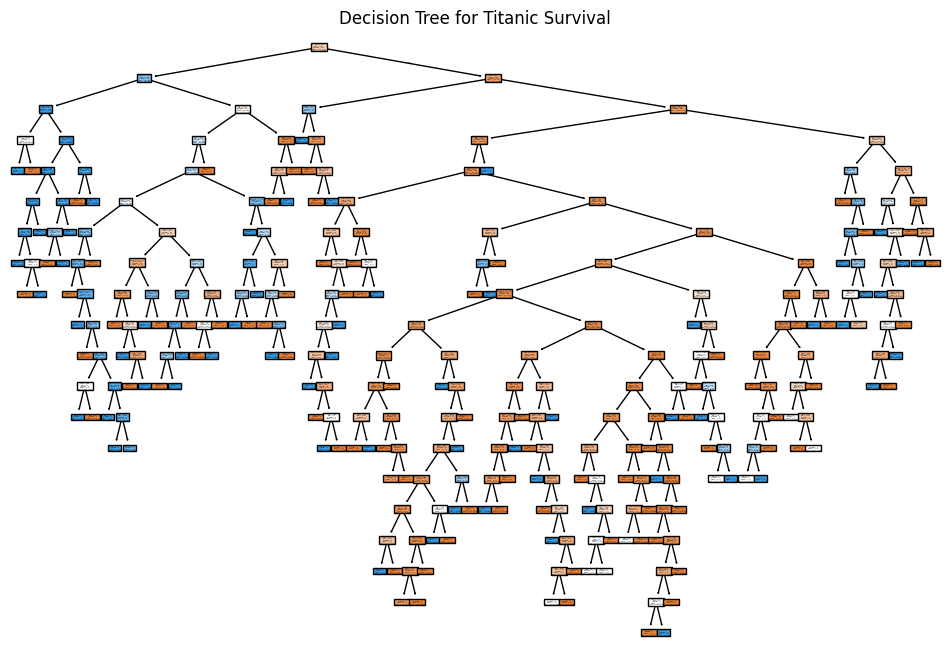

In [47]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title('Decision Tree for Titanic Survival')
plt.show()


Prediction and Performance Evaluation

In [48]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 74.63%
Confusion Matrix:
[[122  35]
 [ 33  78]]


Task 6: Model Tuning

In [49]:
# Initializing lists to store results
max_depths = [None, 3, 5, 10]
min_samples_splits = [2, 5, 10]
results = []

In [50]:
# Evaluate performance for different combinations of max_depth and min_samples_split
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        # Create and train the model
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        dt_classifier.fit(X_train, y_train)
        
        # Evaluate the model
        train_acc = accuracy_score(y_train, dt_classifier.predict(X_train))
        test_acc = accuracy_score(y_test, dt_classifier.predict(X_test))
        
        # Store the results
        results.append({
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })

In [51]:
# Converting results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

In [52]:
# Check for NaN values in max_depth
print("NaN values in max_depth:", results_df['max_depth'].isna().sum())

NaN values in max_depth: 3


Results Visualization

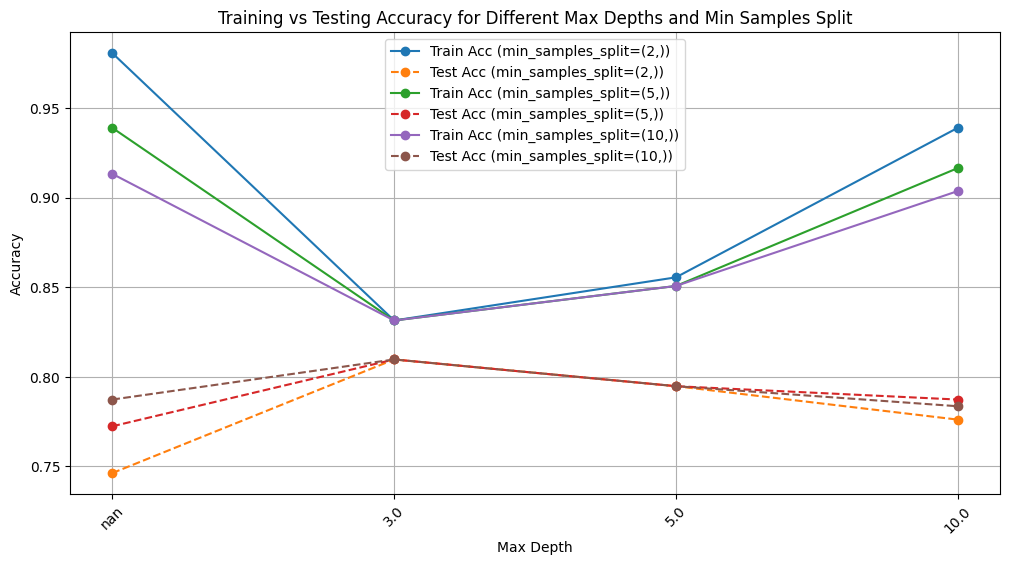

In [53]:
# Plotting training vs testing accuracy
plt.figure(figsize=(12, 6))
for key, grp in results_df.groupby(['min_samples_split']):
    plt.plot(grp['max_depth'].astype(str), grp['train_accuracy'], marker='o', label=f'Train Acc (min_samples_split={key})')
    plt.plot(grp['max_depth'].astype(str), grp['test_accuracy'], marker='o', linestyle='--', label=f'Test Acc (min_samples_split={key})')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Max Depths and Min Samples Split')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [54]:
print("\nPerformance Comparison:")
print(results_df)


Performance Comparison:
    max_depth  min_samples_split  train_accuracy  test_accuracy
0         NaN                  2        0.980738       0.746269
1         NaN                  5        0.939005       0.772388
2         NaN                 10        0.913323       0.787313
3         3.0                  2        0.831461       0.809701
4         3.0                  5        0.831461       0.809701
5         3.0                 10        0.831461       0.809701
6         5.0                  2        0.855538       0.794776
7         5.0                  5        0.850722       0.794776
8         5.0                 10        0.850722       0.794776
9        10.0                  2        0.939005       0.776119
10       10.0                  5        0.916533       0.787313
11       10.0                 10        0.903692       0.783582
